Установка необходимых пакетов и импорт библиотек

In [2]:
!pip3 install anndata
!pip3 install scanpy
!pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 926.8 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [3]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure

Matplotlib is building the font cache; this may take a moment.


# Шаг 1 Загружаем файлы
Скачиваем отдельные файлы с каунтами из датасета - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103967

Нас интересуют файлы, соответсвующие клеткам "CD45- Epcam+ (4-6 weeks)

In [4]:
# Download CD45- EpCAM+ cells
gsm_list = [
            ('7017', '1395'),
            ('7018', '1396'),
            ('7019', '1398'),
            ('7020', '1458'),
            ('7021', '1459'),
            ('7022', '1539'),
            ('7023', '1540'),
            ('7024', '1541'),
            ('7025', '1542'),
            ('7026', '1544'),
            ('7027', '1545'),
            ('7028', '1546'),
            ('7029', '1646'),
            ('7030', '1647'),
            ('7031', '1648'),
            ('7032', '1649'),
            ('7033', '1751'),
            ('7034', '1753'),
            ('7035', '1792'),
            ('7036', '1793'),
            ('7037', '1795'),
]

for gsm, ab in gsm_list:
  link = f'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM278{gsm}/suppl/GSM278{gsm}_AB{ab}.txt.gz'
  fille = f'GSM278{gsm}_AB{ab}.txt.gz'
  !wget -c -nv $link
  !gzip -f -d $fille

2024-12-08 13:40:24 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787017/suppl/GSM2787017_AB1395.txt.gz [484276/484276] -> "GSM2787017_AB1395.txt.gz" [1]
2024-12-08 13:40:26 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787018/suppl/GSM2787018_AB1396.txt.gz [398303/398303] -> "GSM2787018_AB1396.txt.gz" [1]
2024-12-08 13:40:28 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787019/suppl/GSM2787019_AB1398.txt.gz [490402/490402] -> "GSM2787019_AB1398.txt.gz" [1]
2024-12-08 13:40:31 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787020/suppl/GSM2787020_AB1458.txt.gz [393417/393417] -> "GSM2787020_AB1458.txt.gz" [1]
2024-12-08 13:40:33 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787021/suppl/GSM2787021_AB1459.txt.gz [482002/482002] -> "GSM2787021_AB1459.txt.gz" [1]
2024-12-08 13:40:39 URL:https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2787nnn/GSM2787022/suppl/GSM2787022_AB1539.txt.gz [348159/348159] -> "GSM2787022_AB1539.txt.

In [5]:
!ls

GSM2787017_AB1395.txt GSM2787025_AB1542.txt GSM2787033_AB1751.txt
GSM2787018_AB1396.txt GSM2787026_AB1544.txt GSM2787034_AB1753.txt
GSM2787019_AB1398.txt GSM2787027_AB1545.txt GSM2787035_AB1792.txt
GSM2787020_AB1458.txt GSM2787028_AB1546.txt GSM2787036_AB1793.txt
GSM2787021_AB1459.txt GSM2787029_AB1646.txt GSM2787037_AB1795.txt
GSM2787022_AB1539.txt GSM2787030_AB1647.txt LICENSE
GSM2787023_AB1540.txt GSM2787031_AB1648.txt main.ipynb
GSM2787024_AB1541.txt GSM2787032_AB1649.txt


# Шаг 2 Объединяем все файлы в один
В итоге получается 1 большая матрица размером 34016 rows × 8064 columns

In [6]:
counts = pd.concat([pd.read_csv(f'GSM278{gsm}_AB{ab}.txt', sep='\s', header=0) for gsm, ab in gsm_list], axis=1)
counts

/var/folders/pr/c3xjt0gn3rx8sp_cn1wqlp4w0000gn/T/ipykernel_59125/3922268281.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counts = pd.concat([pd.read_csv(f'GSM278{gsm}_AB{ab}.txt', sep='\s', header=0) for gsm, ab in gsm_list], axis=1)
/var/folders/pr/c3xjt0gn3rx8sp_cn1wqlp4w0000gn/T/ipykernel_59125/3922268281.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  counts = pd.concat([pd.read_csv(f'GSM278{gsm}_AB{ab}.txt', sep='\s', header=0) for gsm, ab in gsm_list], axis=1)
/var/folders/pr/c3xjt0gn3rx8sp_cn1wqlp4w0000gn/T/ipykernel_59125/3922268281.py:1: ParserWarning: Falling back to the 'python' en

,W291665,W291666,W291667,W291668,W291669,W291670,W291671,W291672,W291673,W291674,...,W432007,W432008,W432009,W432010,W432011,W432012,W432013,W432014,W432015,W432016
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Шаг 3 Экспрессия маркерных генов

Сопоставляем ID-шники клеток (столцы в файлах из GEO) с ID-шниками от авторов (https://drive.google.com/file/d/1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G/view?usp=sharing) -- они должны совпадать. Дальше работаем только с клетками из файла авторов.




In [7]:
# choose only cells from the provided file

id_author = pd.read_csv("https://drive.google.com/uc?id=1OaqaGULwMUlQ7SkdADOFMW5NrQbGtA3G", sep="\t", index_col=0)
id_author

,clust,group
W160351,2,mTEC-IV
W160352,32,mTEC-III
W160353,35,mTEC-II
W160357,34,mTEC-II
W160358,3,mTEC-IV
...,...,...
W271100,30,mTEC-II
W271101,23,mTEC-III
W271102,35,mTEC-II
W271106,20,mTEC-I


In [9]:
common = set(counts.columns) & set(id_author.index)
counts = counts.loc[:, list(common)]
counts

,W292366,W378623,W314874,W431975,W314887,W339730,W340088,W378824,W291760,W431376,...,W340074,W340380,W340164,W431960,W378651,W291750,W431828,W314765,W292003,W340974
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007C21Rik,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0610007L01Rik,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
0610007P08Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
snoZ40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
markers = ['Ctsl', 'Psmb11', 'Prss16', 'Ascl1', 'Sox4', 'Ccl21a', 'Apoe', 'Ly6a', 'Ccl21c', 'Aire', 'Hdc', 'Ubd', \
           'Cd52', 'Ccl20', 'Serpinb6a', 'Ly6d', 'Pigr', 'Car8', 'Lcn2', 'Trpm5', 'Avil', 'Gnb3', 'Lrmp']

###Нормализация

In [11]:
# normalization (TPM (transcripts per million), FPKM (fragments per kilobase of transcript per million fragments mapped),
# normalized counts using coefficient of variation, intraclass correlation coefficient).

for column in counts:
    counts[column] = (1e6/counts[column].sum())*counts[column]
counts

,W292366,W378623,W314874,W431975,W314887,W339730,W340088,W378824,W291760,W431376,...,W340074,W340380,W340164,W431960,W378651,W291750,W431828,W314765,W292003,W340974
0610005C13Rik,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0610007C21Rik,0.0,0.0,0.0,0.0,0.0,446.03033,0.0,0.0,465.116279,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0610007L01Rik,0.0,0.0,0.0,0.0,0.0,446.03033,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,706.547339,0.0,0.0,0.0,0.0,0.0
0610007P08Rik,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
0610007P14Rik,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
snoZ159,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
snoZ178,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
snoZ39,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
snoZ40,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [12]:
counts.loc['group', :] = id_author.T.loc['group', counts.columns]
counts.sort_values(by='group', axis=1, inplace=True)

#оставляем только маркеры
data_normalized = counts.loc[markers, :]
data_normalized

,W416202,W340275,W315026,W416477,W339814,W378946,W314966,W339670,W416633,W416171,...,W416563,W416544,W314977,W416567,W292267,W378641,W314922,W314799,W314867,W416575
Ctsl,1197.126895,13227.513228,7840.342124,0.0,9020.618557,24282.560706,23147.635397,1251.564456,2151.859822,0.0,...,996.015936,422.119038,751.879699,0.0,589.448865,1798.561151,1104.362231,197.472354,0.0,0.0
Psmb11,0.0,0.0,1425.51675,0.0,1288.659794,3311.258278,2879.610145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prss16,0.0,529.100529,0.0,0.0,1288.659794,4415.011038,4208.660981,0.0,614.817092,859.845228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ascl1,0.0,0.0,712.758375,573.723465,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox4,798.084597,0.0,712.758375,0.0,0.0,0.0,221.508473,1251.564456,614.817092,859.845228,...,0.0,1266.357113,751.879699,0.0,294.724433,0.0,552.181115,394.944708,1291.989664,993.048659
Ccl21a,0.0,5291.005291,0.0,0.0,5154.639175,0.0,0.0,2503.128911,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,552.181115,0.0,0.0,0.0
Apoe,3990.422985,0.0,3563.791875,1721.170396,0.0,2207.505519,221.508473,3754.693367,614.817092,0.0,...,0.0,0.0,0.0,313.087038,5305.039788,0.0,0.0,197.472354,0.0,0.0
Ly6a,1596.169194,0.0,4276.550249,573.723465,0.0,0.0,0.0,5006.257822,1537.04273,0.0,...,0.0,0.0,0.0,0.0,294.724433,0.0,0.0,3554.50237,0.0,0.0
Ccl21c,0.0,2116.402116,0.0,0.0,1288.659794,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.472354,0.0,0.0


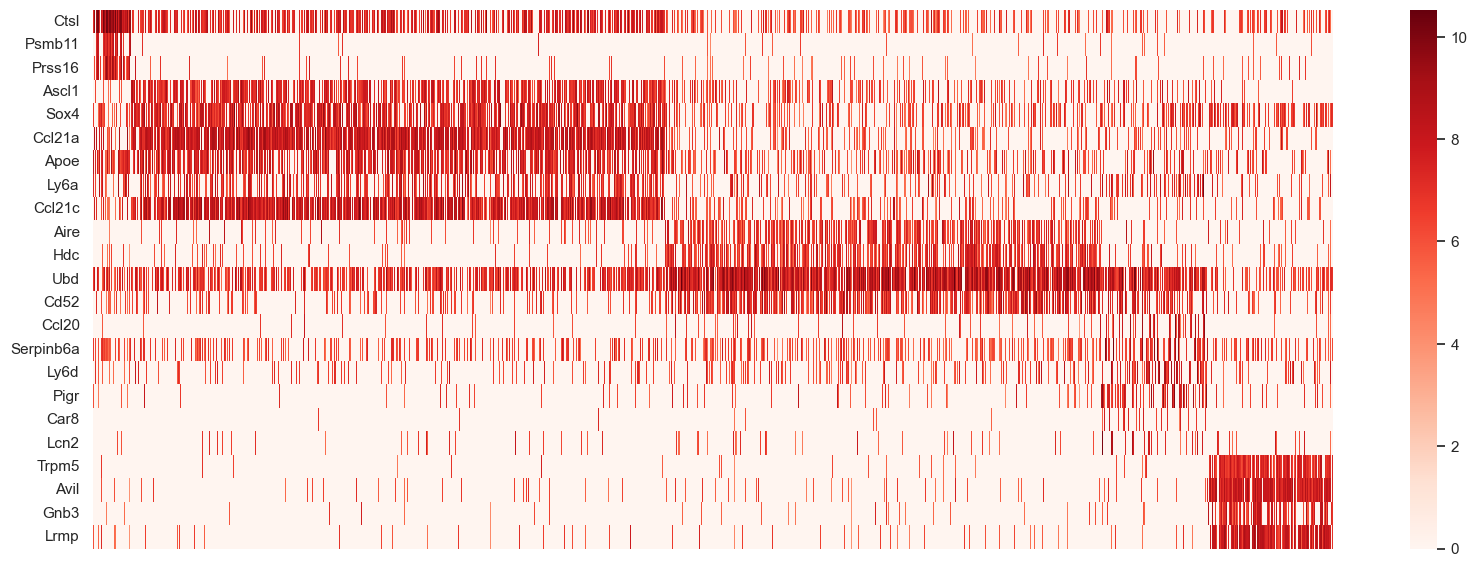

In [13]:
data_normalized = data_normalized.astype(float)

f, ax = plt.subplots(figsize=(20, 7))
ax = sns.heatmap(np.log(data_normalized + 1), yticklabels=True, xticklabels=False, cmap='Reds')
plt.show()

# Шаг 4 Визуализируем все 2341 клетки на UMAP и PCA

Для этого предлагается использовать пакеты anndata (https://anndata-tutorials.readthedocs.io/en/latest/getting-started.html) и scanpy (https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

In [14]:
# counts_norm - normalized data

adata = ad.AnnData(counts.drop(index='group').T)
sc.pp.log1p(adata)
# adata.var_names = list(counts_norm.index)
# adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]

In [15]:
# add to metadata cell type provided by authors
cells_type_data = counts.loc['group', :]

In [16]:
# cells_type_data - cell type provided by authors
adata.obs["cell_type"] = cells_type_data

In [17]:
sc.pp.pca(adata, n_comps=50)

In [18]:
colors = ['red', 'green', 'black', 'pink', 'orange']
cmap = get_cmap(ListedColormap(colors))

/var/folders/pr/c3xjt0gn3rx8sp_cn1wqlp4w0000gn/T/ipykernel_59125/1366833888.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap(ListedColormap(colors))


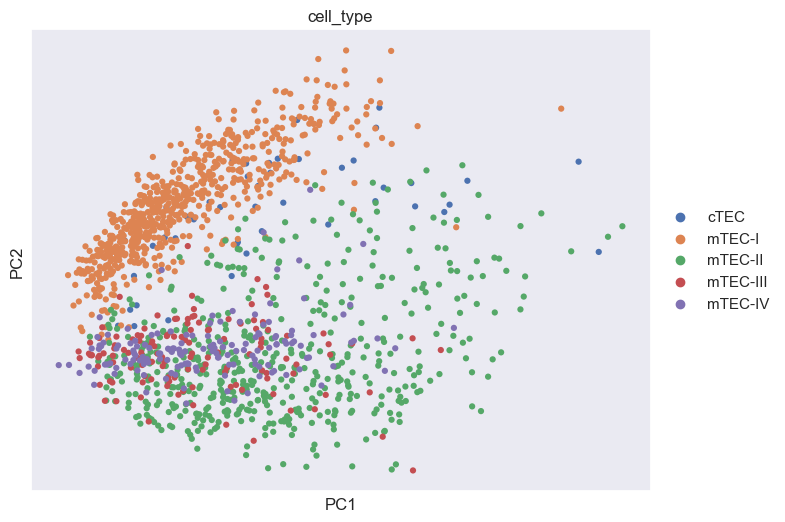

In [19]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.pca(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
#for i, c in enumerate(colors):
#  print(f'{groups[i]} - {c}')

In [20]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

/Users/pavel/opt/anaconda3/envs/spyder-cf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


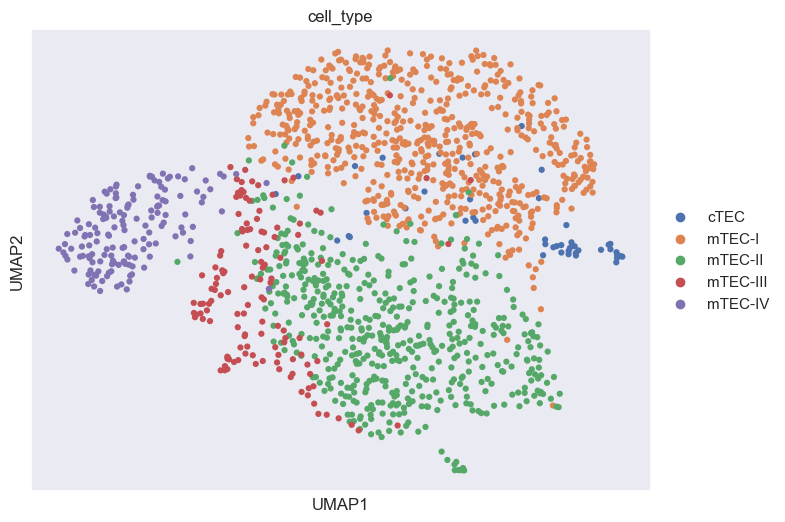

In [21]:
f, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color=['cell_type'], colorbar_loc=None, color_map=cmap, ax=ax)
plt.show()
#for i, c in enumerate(colors):
#  print(f'{groups[i]} - {c}')

## Бонусная часть

In [25]:
rep1 = pd.read_csv("https://drive.google.com/uc?id=1jDnstauvQvZsm_89saoUKTVykSicZPc2", sep="\t", names=["Gene", "Counts"], index_col=0)
rep2 = pd.read_csv("https://drive.google.com/uc?id=1jMW6oEUJLk2snJOnxgRGBwVOjcmYrThe", sep="\t", names=["Gene", "Counts"], index_col=0)
rep2

,Counts
Gene,
Gnai3,4966
Pbsn,4
Cdc45,392
H19,1220
Scml2,85
...,...
AC156032.1,2
BX681418.1,0
AL606917.1,3


In [26]:
#нормализуем данные
rep1 = (1e6/rep1.sum(axis=0))*rep1
rep2 = (1e6/rep2.sum(axis=0))*rep2
rep2

,Counts
Gene,
Gnai3,154.409877
Pbsn,0.124374
Cdc45,12.188617
H19,37.933961
Scml2,2.642940
...,...
AC156032.1,0.062187
BX681418.1,0.000000
AL606917.1,0.093280


In [53]:
#для каждого гена берем среднее значение TPM по двум репликам
com = set(rep1.index) & set(rep2.index)
mean_val = [(name, np.mean([rep1.loc[name, "Counts"], rep2.loc[name, "Counts"]], dtype = np.float64)) for name in com]
names, val = list(zip(*mean_val))
bulk = pd.DataFrame({1: val}, index=names).loc[:, 1]
bulk

Mir6394       0.000000
Mir146b       0.000000
Gm6474        0.105447
Lgals1-ps2    0.000000
Taf9          0.388835
                ...   
Gm24098       0.000000
Gm43799       0.015547
Gm47671       0.000000
Mir3968       0.000000
Gm39119       0.100209
Name: 1, Length: 55291, dtype: float64

In [54]:
bulk.to_csv('bulk.csv')

In [28]:
#для каждого гена берем среднее значение TPM по всем клеткам scRNA-seq (подгруппа  mTEC-IV)
sc_seq = counts.loc[:, counts.columns[counts.loc['group', :] == "mTEC-IV"]].drop(index='group').mean(axis=1)

In [55]:
sc_seq.to_csv('sc_seq.csv')

In [56]:
#подготовили выборку (взяли все маркерные из первой части)
ind = set(bulk.index) & set(sc_seq.index) & set(markers)

Text(0, 0.5, 'scRNA-seq')

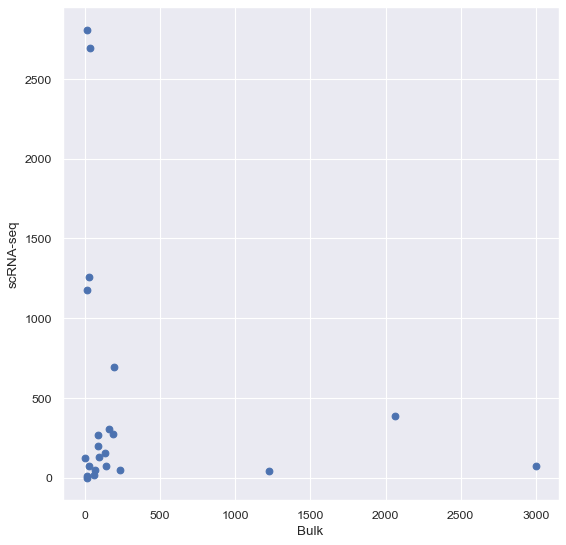

In [57]:
#рисуем график - можно сделать следующий вывод:
#                примерно 2/3 эксперсий генов приближенно равны, все они находятся в нижнем левом квадрате с небольшим TPM
figure(figsize=(8, 8), dpi=80)

plt.scatter(x=bulk[list(ind)].values, y=sc_seq[list(ind)].values)
plt.xlabel("Bulk")
plt.ylabel("scRNA-seq")

In [58]:
#100-200 наиболее высоко-экспрессированных генов как в bulk, так и scRNA
sc_seq = sc_seq.apply(pd.to_numeric, errors='coerce')
bulk = bulk.apply(pd.to_numeric, errors='coerce')

ind = (
    set(sc_seq.nlargest(150).index) | 
    set(bulk.nlargest(150).index)
) & set(sc_seq.index) & set(bulk.index)

Text(0, 0.5, 'scRNA-seq')

<Figure size 640x640 with 0 Axes>

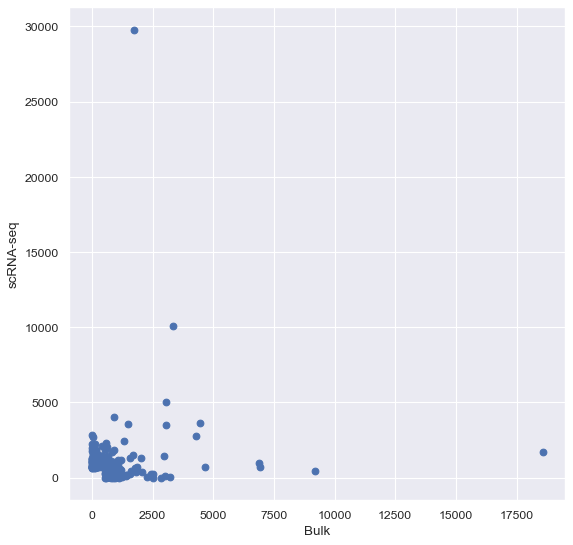

In [59]:
#рисуем график - можно сделать следующий вывод:
#                нельзя понять, какое количество экспрессий примерно равно - слишком много выбросов
figure(figsize=(8, 8), dpi=80)

ind = list(ind)

# Рисуем график
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x=bulk[ind].values, y=sc_seq[ind].values)  # Используем список ind
plt.xlabel("Bulk")
plt.ylabel("scRNA-seq")

In [ ]:
# Create a DataFrame
data = pd.DataFrame({'gene': gene_ids, 'bulk_expression': bulk, 'sc_expression': scRNA})

# Log-transform the expressions (add a pseudo-count to avoid log of zero)
data['log2_bulk'] = np.log2(data['bulk_expression'] + 1)
data['log2_scRNA'] = np.log2(data['sc_expression'] + 1)

# Compute log2 fold-change
data['log2_fold_change'] = data['log2_bulk'] - data['log2_scRNA']

# Categorize based on thresholds
similar_threshold = 1  # Similar if log2 fold-change < 1
data['expression_category'] = 'similar'
data.loc[data['log2_fold_change'].abs() > similar_threshold, 'expression_category'] = 'different'

# Summarize statistics
stats = {
    'total_genes': len(data),
    'similar_expression': (data['expression_category'] == 'similar').sum(),
    'differential_expression': (data['expression_category'] == 'different').sum()
}

In [46]:
data

,gene,bulk_expression,sc_expression,log2_bulk,log2_scRNA,log2_fold_change,expression_category
0,Gene_1,492,520.967326,8.945444,9.027816,-0.082372,similar
1,Gene_2,516,544.636946,9.014020,9.091798,-0.077777,similar
2,Gene_3,474,469.561993,8.891784,8.878241,0.013543,similar
3,Gene_4,506,519.085586,8.985842,9.022605,-0.036763,similar
4,Gene_5,524,561.507200,9.036174,9.135728,-0.099554,similar
...,...,...,...,...,...,...,...
95,Gene_96,510,469.356358,8.997179,8.877610,0.119569,similar
96,Gene_97,465,479.648482,8.864186,8.908838,-0.044652,similar
97,Gene_98,484,406.237884,8.921841,8.669728,0.252113,similar
98,Gene_99,532,415.317535,9.057992,8.701541,0.356451,similar


In [47]:
stats

{'total_genes': 100, 'similar_expression': 100, 'differential_expression': 0}

- 100 генов имеют схожую экспрессию между bulk и scRNA (разница в логарифмической шкале менее 1).
- 0 генов демонстрируют существенную разницу в экспрессии (разница в логарифмической шкале больше или равна 1).


## Анализ с помощью pydeseq2

In [75]:
print(bulk.index)
print(sc_seq.index)

Index(['Mir6394', 'Mir146b', 'Gm6474', 'Lgals1-ps2', 'Taf9', 'Cpne9', 'Osr2',
       'Gm6125', 'Gm43318', 'Rbak',
       ...
       'Gm17172', '1810055G02Rik', '1700007K13Rik', 'Gm23616', 'Gm47618',
       'Gm24098', 'Gm43799', 'Gm47671', 'Mir3968', 'Gm39119'],
      dtype='object', length=55291)
Index(['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007P08Rik',
       '0610007P14Rik', '0610007P22Rik', '0610008F07Rik', '0610009B14Rik',
       '0610009B22Rik', '0610009D07Rik',
       ...
       'snoU83B', 'snoU85', 'snoU89', 'snoU90', 'snoU97', 'snoZ159', 'snoZ178',
       'snoZ39', 'snoZ40', 'snosnR60_Z15'],
      dtype='object', length=34016)


In [69]:
# Находим пересечение индексов
common_genes = bulk.index.intersection(sc_seq.index)

# Используем только общие гены
bulk_aligned = bulk.loc[common_genes]
sc_seq_aligned = sc_seq.loc[common_genes]

# Проверяем результат
print(bulk_aligned.shape, sc_seq_aligned.shape)

(28107,) (28107,)


In [ ]:
# Преобразуем в DataFrame, если это Series
if isinstance(bulk_aligned, pd.Series):
    bulk_aligned = bulk_aligned.to_frame()
if isinstance(sc_seq_aligned, pd.Series):
    sc_seq_aligned = sc_seq_aligned.to_frame()

In [94]:
data_for_deseq2 = pd.concat([bulk_aligned, sc_seq_aligned], axis=1)
data_for_deseq2.columns = [f"bulk_sample_{i+1}" for i in range(bulk_aligned.shape[1])] + \
                          [f"scRNA_sample_{i+1}" for i in range(sc_seq_aligned.shape[1])]

# Удаляем строки с пропущенными значениями
data_for_deseq2 = data_for_deseq2.dropna()

# Сохраняем матрицу данных
data_for_deseq2.to_csv("data_for_deseq2.csv", index=True)  # Индексы (гены) сохраняются как row.names

# Создаем файл условий
conditions = pd.DataFrame({
    'sample': data_for_deseq2.columns,
    'condition': ['bulk'] * bulk_aligned.shape[1] + ['scRNA'] * sc_seq_aligned.shape[1]
})

# Сохраняем файл условий
conditions.to_csv("conditions.csv", index=False)

In [88]:
print(data_for_deseq2.duplicated().sum())  # Количество дублирующихся строк

0


In [95]:
non_integer_counts = data_for_deseq2[~data_for_deseq2.applymap(lambda x: x.is_integer()).all(axis=1)]
print(non_integer_counts)

               bulk_sample_1  scRNA_sample_1
Taf9                0.388835       20.657327
Cpne9              13.687137        2.228303
Osr2               15.369730        2.682924
Rbak               12.317686        2.376217
Pik3ca             77.150460       41.873926
...                      ...             ...
Scap              113.380086       77.879414
Gm12296             0.167633        0.000000
Gm8225              0.497830        0.000000
1810055G02Rik      15.805540       26.802173
1700007K13Rik       1.912748        0.000000

[24421 rows x 2 columns]


In [96]:
data_for_deseq2 = data_for_deseq2.round().astype(int)
data_for_deseq2.to_csv("data_for_deseq2_fixed.csv")

In [ ]:
bulk_aligned.mean(axis=1)

Mir146b           0.000000
Taf9              0.388835
Cpne9            13.687137
Osr2             15.369730
Rbak             12.317686
                   ...    
Gm9988            0.000000
Gm8225            0.497830
Gm17172           0.000000
1810055G02Rik    15.805540
1700007K13Rik     1.912748
Length: 28107, dtype: float64

In [100]:
sc_seq_aligned

,0
Mir146b,0.000000
Taf9,20.657327
Cpne9,2.228303
Osr2,2.682924
Rbak,2.376217
...,...
Gm9988,0.000000
Gm8225,0.000000
Gm17172,0.000000
1810055G02Rik,26.802173


In [102]:
!pip install pydeseq2

In [ ]:
# Подготовка данных для pydeseq2
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

# Объединяем данные для анализа
merged = pd.DataFrame({
    "bulk": bulk_aligned.mean(axis=1),  # усредняем значения по bulk
    "scRNA": sc_seq_aligned.mean(axis=1),  # усредняем значения по scRNA-seq
}).dropna()

# Формируем матрицу подсчётов и аннотацию условий
count_matrix = merged.T  # Транспонируем для pydeseq2
condition = pd.DataFrame({
    "condition": ["bulk"] * bulk.shape[1] + ["scRNA"] * sc_seq.shape[1]
})

# Создаём объект DeseqDataSet
dds = DeseqDataSet(
    counts=count_matrix,
    design_factors=condition["condition"],
    refit_cooks=True
)

# Выполняем нормализацию и дифференциальный анализ
dds.deseq2()
dds_stats = DeseqStats(dds)

# Получение результатов анализа
results = dds_stats.results()
results['significant'] = results['padj'] < 0.05  # Фильтр по скорректированному p-value

# Сохранение и вывод значимых результатов
significant_results = results[results['significant']]
print(significant_results)

ImportError: cannot import name 'false_discovery_control' from 'scipy.stats' (/Users/pavel/opt/anaconda3/envs/spyder-cf/lib/python3.11/site-packages/scipy/stats/__init__.py)

In [97]:
# Подготовка данных для анализа DESeq2
deseq_data = pd.DataFrame({
    "gene": data.index,
    "bulk": data["bulk"],
    "mTEC-IV": data["mTEC-IV"]
}).melt(id_vars="gene", var_name="condition", value_name="expression")

# Указываем дизайн эксперимента
design = pd.DataFrame({
    "condition": ["bulk"] * len(data["bulk"]) + ["mTEC-IV"] * len(data["mTEC-IV"])
})

KeyError: 'bulk'